In [3]:
import functions as fn
from functions import *

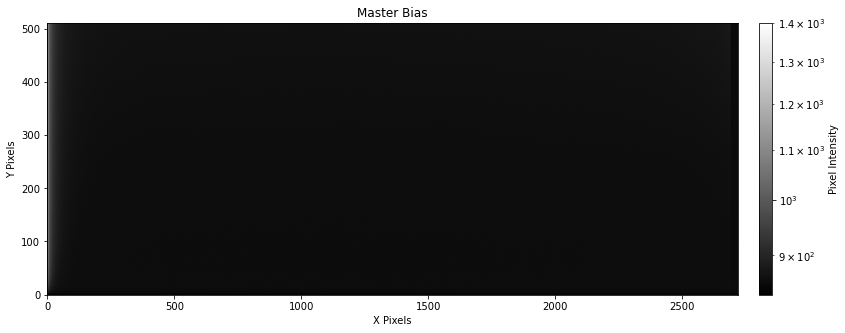

In [4]:
bias_files = []
for i in range(1, 11):
    file_path = f'./data/bias{i:04d}.fits'
    bias_files.append(file_path)
master_bias = fn.create_master_bias(bias_files)
np.save('./data/master_bias.npy', master_bias)

fn.plot_fits(master_bias, 'Master Bias', LogNorm())

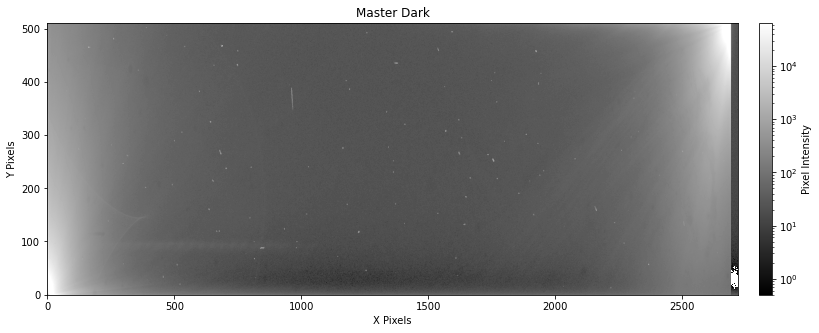

In [5]:
# EXPTIME data = 1800 s
# EXPTIME dark frame 3 = 1800 s (others are way smaller)
dark_files = ['./data/dark0003.fits']
master_dark = fn.create_master_dark(dark_files, master_bias)
np.save('./data/master_dark.npy', master_dark)

# Plot the data
plot_fits(
    master_dark,
    title=f'Master Dark',
    norm=LogNorm(),  # Linear scale
)

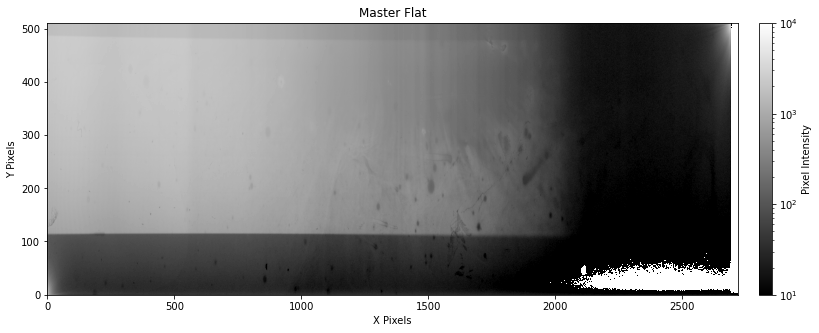

In [6]:
flat_files = []
for i in range(12, 23):
    file_path = f'./data/flat{i:04d}.fits'
    flat_files.append(file_path)
master_flat = fn.create_master_flat(flat_files, master_bias)
np.save('./data/master_flat.npy', master_flat)

fn.plot_fits(master_flat, 'Master Flat', LogNorm(vmin=1e1, vmax=1e4))

In [7]:
data = fn.read_fits('./data/source.fits')
data = data - master_bias
data = data - master_dark
data = data / master_flat
np.save('./data/data.npy', data)

/var/folders/_6/qrnr3nh56fx3nwpd79r6jt4r0000gn/T/ipykernel_39346/3160172578.py:4: RuntimeWarning: divide by zero encountered in true_divide
  data = data / master_flat
/var/folders/_6/qrnr3nh56fx3nwpd79r6jt4r0000gn/T/ipykernel_39346/3160172578.py:4: RuntimeWarning: invalid value encountered in true_divide
  data = data / master_flat


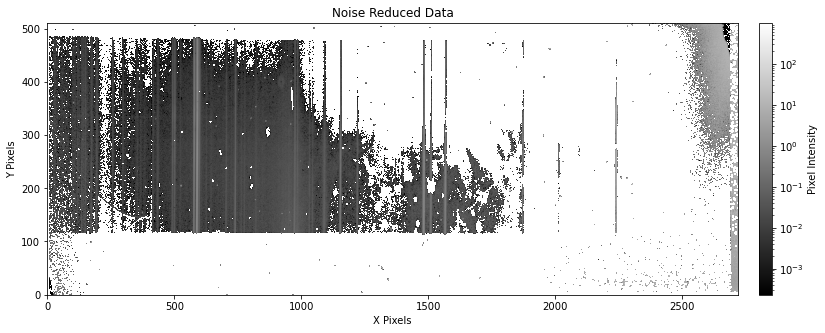

In [10]:
fn.plot_fits(data, 'Noise Reduced Data',)